### Майнор Интеллектуальный анализ данных, курс Введение в анализ данных. Семинар 12. Решающие деревья

##### Надежда Чиркова

Деревья в документации sklearn на примере iris:
[http://scikit-learn.org/stable/modules/tree.html](http://scikit-learn.org/stable/modules/tree.html)

In [1]:
import numpy as np
import pandas
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

Будем работать с датасетом [Page Blocks Classification Data Set](http://archive.ics.uci.edu/ml/datasets/Page+Blocks+Classification)

Признаки:
* height: integer. | Height of the block. 
* lenght: integer. | Length of the block. 
* area: integer. | Area of the block (height * lenght); 
* eccen: continuous. | Eccentricity of the block (lenght / height); 
* p_black: continuous. | Percentage of black pixels within the block (blackpix / area); 
* p_and: continuous. | Percentage of black pixels after the application of the Run Length Smoothing Algorithm (RLSA) (blackand / area); 
* mean_tr: continuous. | Mean number of white-black transitions (blackpix / wb_trans); 
* blackpix: integer. | Total number of black pixels in the original bitmap of the block. 
* blackand: integer. | Total number of black pixels in the bitmap of the block after the RLSA. 
* wb_trans: integer. | Number of white-black transitions in the original bitmap of the block.

Целевая переменная (последняя колонка):

text, horiz. line , graphic, vert. line, picture   

Нормализацию делать не будем, потому что хотим уделить внимание интерпретируемости

In [2]:
#df = pandas.read_csv("house-votes-1984.txt")
df = pandas.read_csv("page-blocks.csv", sep=" ", header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,5,7,35,1.400,0.400,0.657,2.33,14,23,6,1
1,6,7,42,1.167,0.429,0.881,3.60,18,37,5,1
2,6,18,108,3.000,0.287,0.741,4.43,31,80,7,1
3,5,7,35,1.400,0.371,0.743,4.33,13,26,3,1
4,6,3,18,0.500,0.500,0.944,2.25,9,17,4,1


In [4]:
df.shape

(5473, 11)

In [5]:
X = df.values[:, :-1]
y = df.values[:, -1]

In [19]:
n_classes = len(set(y))
n_classes

5

(-10, 200)

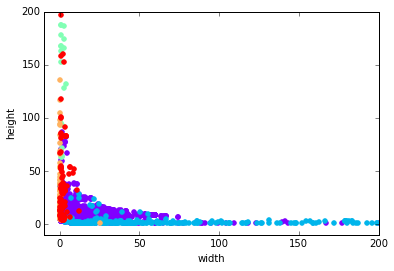

In [88]:
# Попробуем визуализировать разные пары признаков
colors = cm.rainbow(np.linspace(0, 1, 5))
for i in range(1, 6):
    plt.scatter(X[y==i, 3], X[y==i, 0], color=colors[i-1])
plt.xlabel("width")
plt.ylabel("height")
plt.xlim(-10, 200)
plt.ylim(-10, 200)

Видим, что все гораздо менее идеально, чем в <<игрушечных>> ирисах.

In [6]:
from sklearn.utils import shuffle

In [7]:
# Задача: разделить выборку на трейн и тест и преобразовать признаки с 0 и 1
permut = np.random.permutation(np.arange(X.shape[0]))
l = 3000
train_X = X[permut[:l]]
train_y = y[permut[:l]]
test_X = X[permut[l:]]
test_y = y[permut[l:]]

In [8]:
from sklearn import tree

In [76]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_X, train_y)
predict = clf.predict(test_X)

In [58]:
# Accuracy
np.mean(predict==test_y)

0.96198948645369997

In [77]:
clf.feature_importances_   # Это только важность, их нельзя трактовать как вес в линейных моделях

array([ 0.44764496,  0.01747259,  0.01385871,  0.29082858,  0.06906491,
        0.02321186,  0.09467414,  0.02574351,  0.00754671,  0.00995403])

In [11]:
# Так дерево представлено в классификаторе
print clf.tree_.feature
print clf.tree_.children_left
print clf.tree_.children_right
print clf.tree_.threshold

[ 0  6  4  6 -2  3  7 -2  0 -2 -2 -2  3 -2  4  4 -2 -2  6 -2  6 -2 -2  3  5
 -2  3 -2  1 -2 -2  7  3  7  3 -2 -2  2  6 -2  6 -2  3 -2 -2 -2 -2  4  6 -2
 -2  6  8 -2 -2  4 -2  6 -2  7 -2 -2  3  3  3 -2  7  2 -2 -2  8  5 -2  2 -2
 -2  2 -2 -2  4 -2 -2  0  6  7  3  8  5 -2  8  2 -2 -2 -2  2  5  6 -2  4  0
  9  4 -2 -2 -2 -2  4 -2 -2 -2  8 -2  9 -2 -2  6  3 -2 -2  6 -2  3 -2 -2  5
  6 -2  6  5 -2 -2  0  4  1 -2 -2 -2  4 -2 -2  4  3  4  9  2 -2 -2 -2 -2 -2
  8  5  5 -2 -2 -2  0  8  2 -2  5  3  6 -2 -2 -2  2 -2 -2 -2  6  7 -2 -2 -2
  3  7 -2  4  8 -2 -2 -2  5 -2 -2  4  3 -2  2  3  4  4 -2 -2 -2 -2 -2  3  6
  4 -2 -2 -2  1 -2  3 -2 -2]
[  1   2   3   4  -1   6   7  -1   9  -1  -1  -1  13  -1  15  16  -1  -1
  19  -1  21  -1  -1  24  25  -1  27  -1  29  -1  -1  32  33  34  35  -1
  -1  38  39  -1  41  -1  43  -1  -1  -1  -1  48  49  -1  -1  52  53  -1
  -1  56  -1  58  -1  60  -1  -1  63  64  65  -1  67  68  -1  -1  71  72
  -1  74  -1  -1  77  -1  -1  80  -1  -1  83  84  85  86  87  88  -1  9

In [12]:
# С помощью утилиты graphviz (brew install graphviz на Mac, на Windows - google it :)
# и модуля pydot можно построить дерево в виде pdf
from sklearn.externals.six import StringIO  
import pydot
reload(pydot)
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph.write_pdf("tree.pdf")

True

На этот раз дерево получилось гораздо больше. Можно заметить, что давать интерпретацию его решениям достаточно сложно.

Построим разделяющую поверхность, для этого сгенерируем много модельных точек (по сетке). Обратите внимание, что для каждого изображения мы будем заново обучать классификатор, потому что иначе количество признаков в обучении не совпадет с этим числом в контроле.

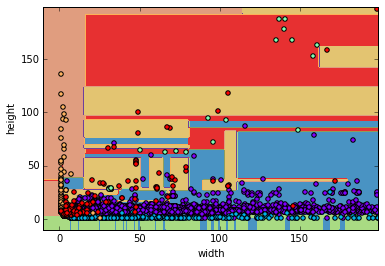

In [91]:
def plot(clf, i, j, x_min, x_max, y_min, y_max, plot_step=1): 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    clf.fit(X[:, [i, j]], y)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.axis("tight")

    for k in range(1, 6):
        plt.scatter(X[y==k, i], X[y==k, j], c=colors[k-1])
    plt.xlabel("width")
    plt.ylabel("height")
    
clf = tree.DecisionTreeClassifier() 
plot(clf, 1, 0, -10, 200, -10, 200)

Далее стоит разобраться с [параметрами классификатора](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

Мы будем наблюдать эффект на паре переменных 1 - 0, потому что так нагляднее. 

Пробуем менять splitter="random" --- поверхность перестает быть повторяемой

max_features="log2" --- поверхность усложняется

max_depth=3 --- поверхность сильно упрощается, появляются ошибки классификации трейна (это логично), но качество на тесте (примерно) такое же

min_samples_leaf=5 --- квадраты становятся больше, снова ошибки классификации на трейне (логично)

max_leaf_nodes=10 --- снова структура упрощается.

random_state --- структура меняется при разных значениях.

0.967246259604


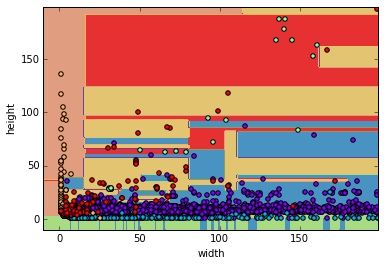

In [103]:
clf = tree.DecisionTreeClassifier(random_state=45)
clf.fit(train_X, train_y)
predict = clf.predict(test_X)
print np.mean(predict==test_y)
plot(clf, 1, 0, -10, 200, -10, 200)

In [108]:
# Давайте визуализируем дерево с max_depth=3
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(train_X, train_y)
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph.write_pdf("tree_short.pdf")

True

In [109]:
clf.feature_importances_   
# Отбор признаков даже получился! Введение ограничений на модель - концептуальный аналог регуляризации

array([ 0.64167624,  0.        ,  0.        ,  0.27479597,  0.01994441,
        0.        ,  0.06358339,  0.        ,  0.        ,  0.        ])

Параметры сильно влияют на структуру дерева: мы либо усложняем его, минимизируя ошибку на обучении, либо упрощаем, делая разделяющую поверхность более понятной. И что же это напоминает...

Вопрос внимательным и сдашим коллоквиум: почему мы не наблюдаем переобучение по метрике качества?

In [146]:
# ответ в Out

Классы не сбалансированы
(array([4913,  329,   28,  203], dtype=int64), array([ 1.,  2.,  3.,  4.,  5.]))


In [111]:
from sklearn.metrics import f1_score
from sklearn.cross_validation import cross_val_score

In [141]:
clf = tree.DecisionTreeClassifier(random_state=87)
clf.fit(train_X, train_y)
predict = clf.predict(test_X)
f1_score(test_y, predict, average="macro")

0.8137500156839037

Посмотрим на f1_macro на кросс-валидации:

In [150]:
cross_val_score(tree.DecisionTreeClassifier(), X, y, "f1_macro").mean()

0.73510178677532456

Вопрос: какие бы вы предложили идеи, как улучшить качество классификации с помощью деревьев?

Так люди и пришли к RandomForest. Но о нем в следующих сериях.

### Задание для самостоятельной работы
С помощью кросс-валидации найдите оптимальные значения параметрво среди следующих:

"max_depth":[2, 4, 8, 16], "criterion":["gini", "entropy"], "min_samples_leaf":[1, 10, 50], 
              "max_leaf_nodes":[10, 100, 1000]

In [147]:
from sklearn.grid_search import GridSearchCV

In [163]:
parameters = {"max_depth":[2, 4, 8, 16], "criterion":["gini", "entropy"], "min_samples_leaf":[1, 10, 50], 
              "max_leaf_nodes":[10, 100, 1000]}
cv = GridSearchCV(tree.DecisionTreeClassifier(), parameters, scoring="f1_macro")
cv.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'max_leaf_nodes': [10, 100, 1000], 'criterion': ['gini', 'entropy'], 'max_depth': [2, 4, 8, 16], 'min_samples_leaf': [1, 10, 50]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='f1_macro', verbose=0)

In [164]:
cv.best_score_

0.75185351080143925

Визуализация оптимального классификатора (достаточно простая разделяющая поверхность):

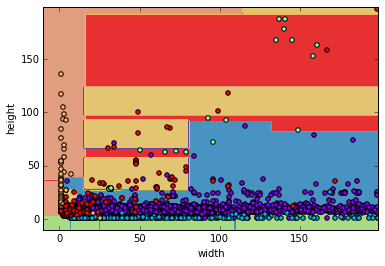

In [165]:
plot(cv, 1, 0, -10, 200, -10, 200)